# ThermoFun tutorial

### Import ThermoFun python package 

In [1]:
import thermofun.PyThermoFun as fun 

### Import a thermodynamic database from a json file

In [2]:
database = fun.Database("databases/aq17-fun.json")

### Initialize a batch calculations object using the loaded database

In [3]:
batch = fun.ThermoBatch(database)

### Optional: set the solvent symbol used for calculating properties of aqueous species

In [4]:
batch.setSolventSymbol("H2O@")

### Optional: set calculation and output preferences

In [5]:
op = fun.BatchPreferences()
op.isFixed = True
op.outSolventProp       = True
op.calcReactFromSubst   = False
op.calcSubstFromReact   = False
batch.setBatchPreferences(op)

### Optional: set units and significant digits

In [6]:
batch.setPropertiesUnits(["temperature", "pressure"],["degC","bar"])

batch.setPropertiesDigits(["gibbs_energy","entropy", "volume",
                            "enthalpy","logKr", "temperature", "pressure"], [0, 4, 4, 4, 4, 0, 0])

### Do calculations and write output

In [7]:
substances = ["Na+", "Mg+2", "Ca+2", "SiO2@"]
properties = ["gibbs_energy", "enthalpy", "entropy"]
temperature_pressure_pairs = [[50,1000],  [150,1000], [200,1000], [250,1000], [300,1000], [350,1000], 
                              [400,1000], [450,1000], [500,1000], [550,1000], [600,1000], [650,1000], 
                              [700,1000], [800,1000], [900,1000], [1000,1000]]

In [8]:
batch.thermoPropertiesSubstance(temperature_pressure_pairs, substances, properties).toCSV("results.csv")

### Import functions for creating csv download link and data plotting

In [9]:
from common.functions import create_csv_download_link, plot_substances_properties_vs_temperature

### Download the results file

In [10]:
create_csv_download_link( "results.csv")

### Plot the results

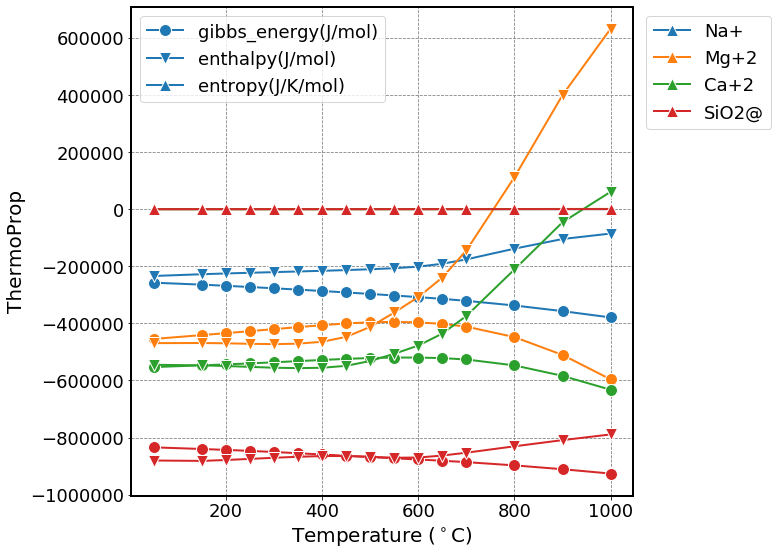

In [11]:
figure = plot_substances_properties_vs_temperature('results.csv', substances, 1000)

In [12]:
figure.savefig("result_figure.png", format = "png")
#create_download_link( "result_figure.png")